In [8]:
# initial setup for any notebook

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/home/yarcoh/projects/thesis-code4") # go to parent dir

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np

from src.general_methods.visualizer import Visualizer
from src.optics.split_step_fourier import SplitStepFourier

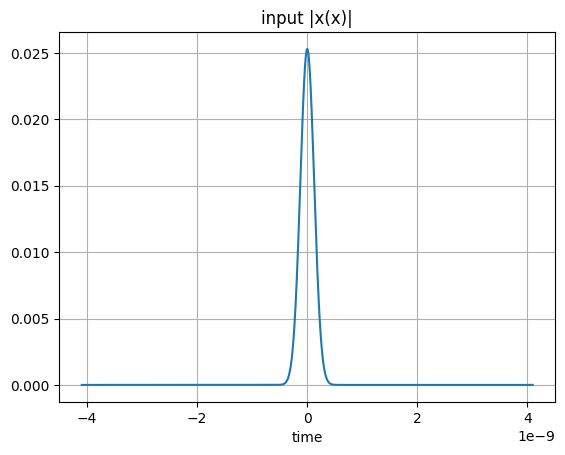

In [10]:
# building the input signal
Po = .00064
C = -2
Ao = np.sqrt(Po)
to = 125e-12
tau_vec = np.arange(-4096e-12, 4095e-12, 1e-12)

x = Ao*np.exp(-((1 + 1j*(-C))/2.0)*(tau_vec/to) ** 2)
x = np.array(x)
Visualizer.my_plot(tau_vec, np.abs(x), name='input |x(x)|', xlabel='time')

SSF params: N = 5000, P_0 = 0.00042666666666666667


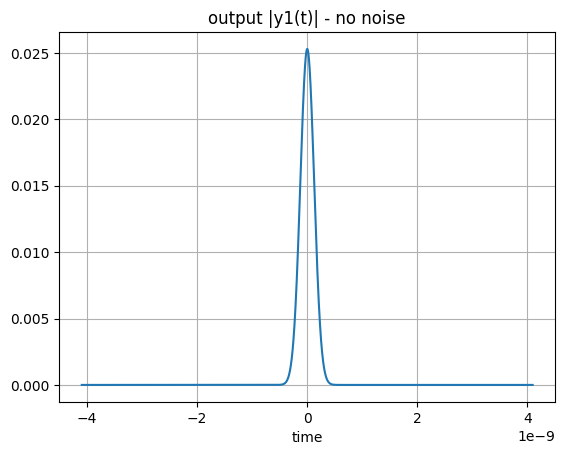

In [11]:
# old channel y1 without noise

ssf = SplitStepFourier(
    b2=-20e-27,
    gamma=0.003,
    t0=125e-12,
    dt=1,
    z_n=1000e3,
    h=200,
    noise_psd=0.1,
    with_noise=False,
    verbose=True
)

y1 = ssf(x)

Visualizer.my_plot(tau_vec, np.abs(y1), name='output |y1(t)| - no noise', xlabel='time')

SSF params: N = 5000, P_0 = 0.00042666666666666667


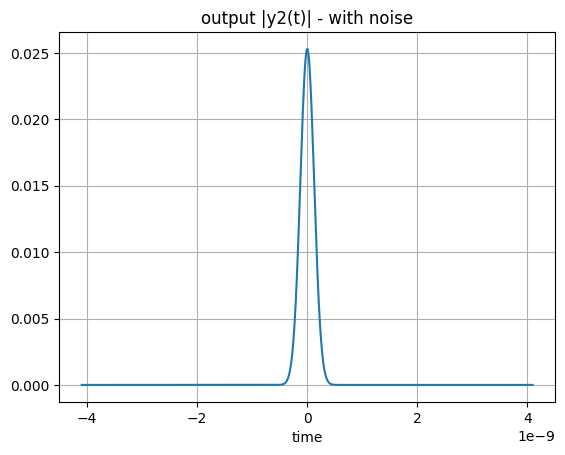

In [12]:
# new channel y2 with noise

ssf = SplitStepFourier(
    b2=-20e-27,
    gamma=0.003,
    t0=125e-12,
    dt=1,
    z_n=1000e3,
    h=200,
    noise_psd=1e-3,
    with_noise=True,
    verbose=True
)

y2 = ssf(x)

Visualizer.my_plot(tau_vec, np.abs(y1), name='output |y2(t)| - with noise', xlabel='time')

In [14]:
SplitStepFourier(noise_psd=0.1)._gen_noise(10)

array([ 4.04092281-4.84407373j,  1.59202386-6.29117075j,
       -4.8843826 -0.78176373j, -8.04143332-3.5319187j ,
        0.69190624-3.10900133j,  0.37724925-3.66003096j,
        1.61779271-3.09574764j,  1.65049174+6.95755734j,
        0.72055347+7.10869064j,  5.70170682-0.77521475j])

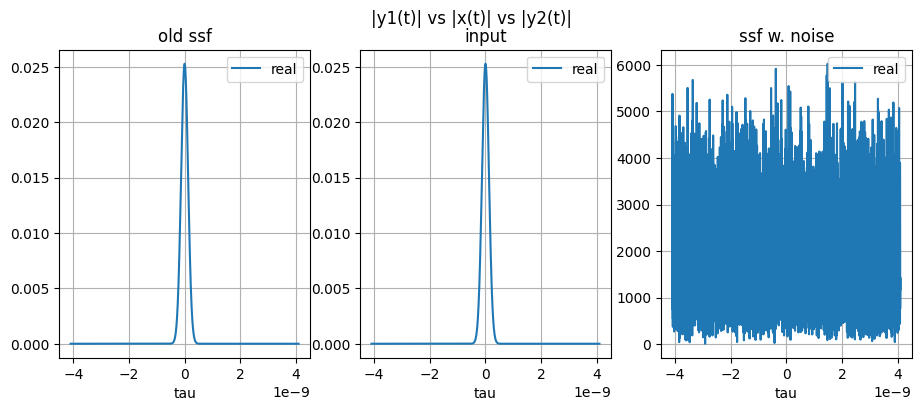

In [13]:
# compare em all


Visualizer.data_trio_plot(np.abs(y1), np.abs(x), np.abs(y2), 
                          zoom_indices=None,
                          title = '|y1(t)| vs |x(t)| vs |y2(t)|',
                          x_vec=tau_vec, xlabel='tau',
                          names=['old ssf', 'input', 'ssf w. noise'])